In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
data=pd.read_csv("insurance_data.csv")

In [67]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


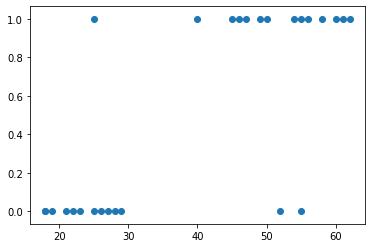

In [9]:
plt.scatter(x=data['age'],y=data['bought_insurance'])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=data[['age']]
y=data['bought_insurance']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [18]:
from sklearn.linear_model import LogisticRegression

In [26]:
model=LogisticRegression(solver='lbfgs')

In [27]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
model.predict(X_test)

array([1, 0, 1], dtype=int64)

In [29]:
X_test

,age
25,54
18,19
8,62


In [30]:
model.score(X_test,y_test)

1.0

In [32]:
model.predict([[25]])

array([0], dtype=int64)

# Exercise Problem


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
import seaborn as sns

In [105]:
data=pd.read_csv('HR_comma_sep.csv')

In [106]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [107]:
left=data[data.left==1]
left.shape

(3571, 10)

In [108]:
retained=data[data.left==0]
retained.shape

(11428, 10)

In [109]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

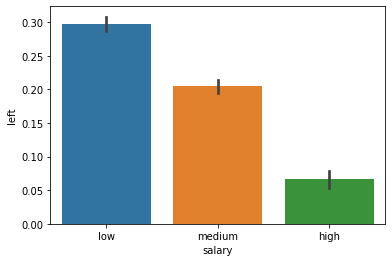

In [110]:
sns.barplot(x='salary',y='left',data=data)

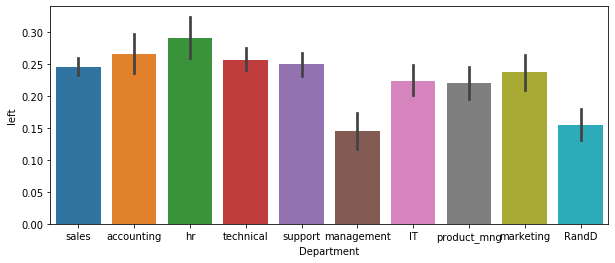

In [111]:
plt.figure(figsize=(10,4))
sns.barplot(x='Department',y='left',data=data)

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1.**Satisfaction Level**
2.**Average Monthly Hours**
3.**Promotion Last 5 Years**
4.**Salary**

In [112]:
data.drop(['last_evaluation','number_project','time_spend_company','Work_accident','Department'],axis=1,inplace=True)

In [113]:
data.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,low
1,0.80,262,1,0,medium
2,0.11,272,1,0,medium
3,0.72,223,1,0,low
4,0.37,159,1,0,low


In [114]:
salary=pd.get_dummies(data['salary'],drop_first=True,prefix='salary')

In [115]:
salary.head()

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [116]:
data=pd.concat([data,salary],axis=1)

In [117]:
data.drop(['salary'],axis=1,inplace=True)

In [118]:
data.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary_low,salary_medium
0,0.38,157,1,0,1,0
1,0.80,262,1,0,0,1
2,0.11,272,1,0,0,1
3,0.72,223,1,0,1,0
4,0.37,159,1,0,1,0


In [119]:
X=data.drop(['left'],axis=1)
y=data.left

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
model=LogisticRegression(solver='lbfgs')

In [124]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
predictions=model.predict(X_test)

In [126]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1136
           1       0.64      0.26      0.37       364

    accuracy                           0.78      1500
   macro avg       0.72      0.60      0.62      1500
weighted avg       0.76      0.78      0.75      1500



In [128]:
model.score(X_test,y_test)

0.7846666666666666